In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datacube
from astropy.io import fits

In [3]:
hdu = fits.open("G1d9_12CO21.fits")
data = hdu[0].data
header = hdu[0].header
dcube = datacube.Cube(data, header)

In [4]:
new_data, new_header = dcube.trimnan()

new_hdu = fits.PrimaryHDU(data=new_data, header=new_header)

new_hdu.writeto("G1d9_12CO21_trimnan.fits", overwrite=True)


In [5]:
new_dcube = datacube.Cube(new_data, new_header)

In [6]:
trim_cube, trim_header = new_dcube.trim_val(-270, 270)

new_hdu = fits.PrimaryHDU(data=trim_cube, header=trim_header)
new_hdu.writeto("G1d9_12CO21_trim-270_1000.fits", overwrite=True)

In [7]:
trim_dcube = datacube.Cube(trim_cube, trim_header)

In [8]:
tmp_line = trim_dcube._get_average_line()

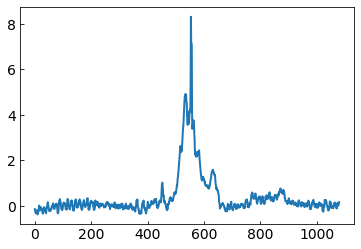

In [9]:
plot(tmp_line)

In [10]:
line_velo = trim_dcube._line_velo(line=tmp_line)

In [11]:
rms, dline, fitline = trim_dcube.baseline(line=tmp_line, win=(-70,70,100,180), full=True)

In [12]:
rms*3

0.40088580960155501

In [ ]:
plot(line_velo, tmp_line)
plot(line_velo, fitline)
xlim(-250, 250)
axvline(x=-70,c="k",ls="--")
axvline(x=-35,c="k",ls="--")
axvline(x=37,c="k",ls="--")
axvline(x=70,c="k",ls="--")
axvline(x=100,c="k",ls="--")
axvline(x=180,c="k",ls="--")

In [13]:
hdu = fits.open("G1d9_13CO21_trim-300_300.fits")
data = hdu[0].data
header = hdu[0].header
dcube13 = datacube.Cube(data, header)


In [14]:
tmp_line13 = dcube13._get_average_line()
line_velo13 = dcube13._line_velo(line=tmp_line13)

In [15]:
rms, dline, fitline = dcube13.baseline(line=tmp_line13, win=(-70,70,100,180), full=True)
rms*3

0.1585023653313711

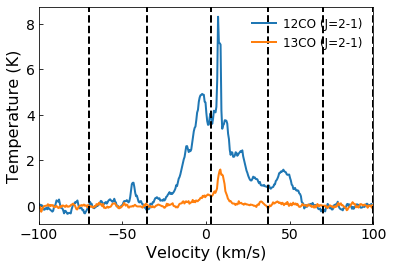

In [16]:
plot(line_velo, tmp_line, label="12CO (J=2-1)")
#plot(line_velo, fitline)
plot(line_velo13, tmp_line13, label="13CO (J=2-1)")
xlim(-100, 100)
xlabel("Velocity (km/s)")
ylabel("Temperature (K)")
axvline(x=-70,c="k",ls="--")
axvline(x=-35,c="k",ls="--")
axvline(x=37,c="k",ls="--")
axvline(x=70,c="k",ls="--")
axvline(x=100,c="k",ls="--")
axvline(x=3,c="k",ls="--")
axvline(x=180,c="k",ls="--")
legend()
#savefig("aver_spec.pdf")

In [ ]:
data, header = trim_dcube.squash(-70, -35)

new_hdu = fits.PrimaryHDU(data=data, header=header)
new_hdu.writeto("G1d9_12CO21_trimnan_squash-70-35.fits", overwrite=True)


In [ ]:
data, header = trim_dcube.squash(-35, 37)

new_hdu = fits.PrimaryHDU(data=data, header=header)
new_hdu.writeto("G1d9_12CO21_trimnan_squash-35_37.fits", overwrite=True)


In [ ]:
data, header = trim_dcube.squash(37, 70)

new_hdu = fits.PrimaryHDU(data=data, header=header)
new_hdu.writeto("G1d9_12CO21_trimnan_squash_37_70.fits", overwrite=True)


In [ ]:
data, header = trim_dcube.squash(100, 180)

new_hdu = fits.PrimaryHDU(data=data, header=header)
new_hdu.writeto("G1d9_12CO21_trimnan_squash_100_180.fits", overwrite=True)

## channel map

In [17]:
from astropy.wcs import WCS

hdu_radio = fits.open("1.51I6.04_AG0184_1985APR16_1_1.07M2.86M.imfits")
data_radio = hdu_radio[0].data
header_radio = hdu_radio[0].header

In [26]:
header_radio["NAXIS"] = 2
#header_radio.__delitem__("NAXIS3")
header_radio.__delitem__("CTYPE3")
header_radio.__delitem__("CRVAL3")
header_radio.__delitem__("CDELT3")
header_radio.__delitem__("CRPIX3")
header_radio.__delitem__("CROTA3")
#header_radio.__delitem__("NAXIS4")
header_radio.__delitem__("CTYPE4")
header_radio.__delitem__("CRVAL4")
header_radio.__delitem__("CDELT4")
header_radio.__delitem__("CRPIX4")
header_radio.__delitem__("CROTA4")

In [18]:
velo_min = -35
velo_max = 37
num = 9
interval = (velo_max-velo_min)/9
print(interval)
velo_mins = arange(num)*interval+velo_min
print(velo_mins, velo_mins+interval)

8.0
[-35. -27. -19. -11.  -3.   5.  13.  21.  29.] [-27. -19. -11.  -3.   5.  13.  21.  29.  37.]


In [19]:
datas, headers = trim_dcube.channel_squash(-35,37, interval=3)

In [20]:
datas[:,:,:].shape

(24, 21, 23)

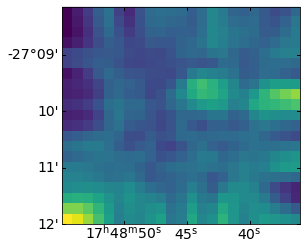

In [21]:
ii = 0
f = plt.figure()
w = WCS(headers[ii])
ax = f.add_subplot(projection=w)
ax.imshow(datas[ii,:,:],origin="low")


In [ ]:
fname = "G1d9_12CO21_channel_"
for ii in range(datas.shape[0]):
    new_hdu = fits.PrimaryHDU(data=datas[ii,:,:], header=headers[ii])
    new_hdu.writeto(fname+str(ii)+".fits", overwrite=True)

In [22]:
trim_cube, trim_header = new_dcube.trim_val(-100, 100)

In [ ]:
trim_cube, trim_header = new_dcube.trim_val(-100, 100)

new_hdu = fits.PrimaryHDU(data=trim_cube, header=trim_header)
new_hdu.writeto("G1d9_12CO21_trim-100_100.fits", overwrite=True)

In [23]:
datas, headers = trim_dcube.channel_squash(-35,37, interval=3)
datas.shape

(24, 21, 23)

In [24]:
velo_min = -35
velo_max = 37
interval = 3
num = (velo_max-velo_min)/interval
print(num)
velo_mins = arange(num)*interval+velo_min
velo_maxs = velo_mins+interval
print(velo_mins, velo_maxs)
velos = 0.5*(velo_mins+velo_maxs)
print(velos)

24.0
[-35. -32. -29. -26. -23. -20. -17. -14. -11.  -8.  -5.  -2.   1.   4.   7.
  10.  13.  16.  19.  22.  25.  28.  31.  34.] [-32. -29. -26. -23. -20. -17. -14. -11.  -8.  -5.  -2.   1.   4.   7.  10.
  13.  16.  19.  22.  25.  28.  31.  34.  37.]
[-33.5 -30.5 -27.5 -24.5 -21.5 -18.5 -15.5 -12.5  -9.5  -6.5  -3.5  -0.5
   2.5   5.5   8.5  11.5  14.5  17.5  20.5  23.5  26.5  29.5  32.5  35.5]


In [27]:

for ii in range(datas.shape[0]):
    fname = "G1d9_12CO21_"+str(ii).zfill(4)
    f = figure()
    w = WCS(headers[ii])
    ax = f.add_subplot(projection=w)
    im = ax.imshow(datas[ii,:,:],origin="low",vmin=0.42)
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    ax.set_xlim((0,datas[ii,:,:].shape[1]-1))
    ax.set_ylim((0,datas[ii,:,:].shape[0]-1))

    ax.contour(data_radio[0,0,:,:], transform=ax.get_transform(WCS(header_radio)),
           levels=[0.001,0.005,0.009,0.013,0.017,0.021,0.025], colors='white', alpha=0.45)
    f.colorbar(im)
    velstr = str(velos[ii])+" km/s"
    ax.text(20,18,velstr,c="w",size=14,ha="right",va="center")
    f.savefig(fname+".png")
    plt.clf()
    plt.cla()
    plt.close()
    

In [ ]:
hdu_radio = fits.open("1.51I6.04_AG0184_1985APR16_1_1.07M2.86M.imfits")
data_radio = hdu_radio[0].data
header_radio = hdu_radio[0].header

In [ ]:
imshow(data_radio[0,0,:,:])

In [ ]:
ii = 4
f = plt.figure()
w = WCS(headers[ii])
ax = f.add_subplot(projection=w)
ax.imshow(datas[ii,:,:],origin="low")
ax.set_xlim((0,datas[ii,:,:].shape[1]-1))
ax.set_ylim((0,datas[ii,:,:].shape[0]-1))

ax.contour(data_radio[0,0,:,:], transform=ax.get_transform(WCS(header_radio)),
           levels=[0.001,0.005,0.009,0.013,0.017,0.021,0.025], colors='white', alpha=0.45)
ax.text(20,18,"kk",c="w",size=14)

In [ ]:
datas[ii,:,:].shape

In [ ]:
datas2, headers2 = trim_dcube.channel_squash(-70,-35, interval=3)

In [ ]:
velo_min = -70
velo_max = -35
interval = 3
num = (velo_max-velo_min)/interval
print(num)
velo_mins = arange(num)*interval+velo_min
velo_maxs = velo_mins+interval
print(velo_mins, velo_maxs)
velos = 0.5*(velo_mins+velo_maxs)
print(velos)

In [ ]:

for ii in range(datas2.shape[0]):
    fname = "G1d9_12CO21_"+"1"+str(ii).zfill(3)
    f = figure()
    w = WCS(headers2[ii])
    ax = f.add_subplot(projection=w)
    im = ax.imshow(datas2[ii,:,:],origin="low",vmin=0.42)
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    ax.set_xlim((0,datas2[ii,:,:].shape[1]-1))
    ax.set_ylim((0,datas2[ii,:,:].shape[0]-1))

    ax.contour(data_radio[0,0,:,:], transform=ax.get_transform(WCS(header_radio)),
           levels=[0.001,0.005,0.009,0.013,0.017,0.021,0.025], colors='white',alph=0.45)
    f.colorbar(im)
    velstr = str(velos[ii])+" km/s"
    ax.text(20,18,velstr,c="w",size=14,ha="right",va="center")
    f.savefig(fname+".png")
    plt.clf()
    plt.cla()
    plt.close()
    

In [ ]:
datas3, headers3 = trim_dcube.channel_squash(100,180, interval=3)

In [ ]:
velo_min = 100
velo_max = 180
interval = 3
num = (velo_max-velo_min)/interval
print(num)
velo_mins = arange(num)*interval+velo_min
velo_maxs = velo_mins+interval
print(velo_mins, velo_maxs)
velos = 0.5*(velo_mins+velo_maxs)
print(velos)

In [ ]:

for ii in range(datas3.shape[0]):
    fname = "G1d9_12CO21_"+"2"+str(ii).zfill(3)
    f = figure()
    w = WCS(headers3[ii])
    ax = f.add_subplot(projection=w)
    im = ax.imshow(datas3[ii,:,:],origin="low",vmin=0.42)
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    ax.set_xlim((0,datas3[ii,:,:].shape[1]-1))
    ax.set_ylim((0,datas3[ii,:,:].shape[0]-1))

    ax.contour(data_radio[0,0,:,:], transform=ax.get_transform(WCS(header_radio)),
           levels=[0.001,0.005,0.009,0.013,0.017,0.021,0.025], colors='white',alpha=0.45)
    f.colorbar(im)
    velstr = str(velos[ii])+" km/s"
    ax.text(20,18,velstr,c="w",size=14,ha="right",va="center")
    f.savefig(fname+".png")
    plt.clf()
    plt.cla()
    plt.close()
    

## 13CO2-1

In [ ]:
hdu = fits.open("G1d9_13CO21_trim-300_300.fits")
data = hdu[0].data
header = hdu[0].header
dcube13 = datacube.Cube(data, header)


In [ ]:
datas13, headers13 = dcube13.channel_squash(-35,37, interval=3)
datas13.shape

In [ ]:
velo_min = -35
velo_max = 37
interval = 3
num = (velo_max-velo_min)/interval
print(num)
velo_mins = arange(num)*interval+velo_min
velo_maxs = velo_mins+interval
print(velo_mins, velo_maxs)
velos = 0.5*(velo_mins+velo_maxs)
print(velos)

In [ ]:

for ii in range(datas13.shape[0]):
    fname = "G1d9_13CO21_"+"0"+str(ii).zfill(3)
    f = figure()
    w = WCS(headers13[ii])
    ax = f.add_subplot(projection=w)
    im = ax.imshow(datas13[ii,:,:],origin="low",vmin=0.15)
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    ax.set_xlim((0,datas13[ii,:,:].shape[1]-1))
    ax.set_ylim((0,datas13[ii,:,:].shape[0]-1))

    ax.contour(data_radio[0,0,:,:], transform=ax.get_transform(WCS(header_radio)),
           levels=[0.001,0.005,0.009,0.013,0.017,0.021,0.025], colors='white',alpha=0.45)
    f.colorbar(im)
    velstr = str(velos[ii])+" km/s"
    ax.text(20,18,velstr,c="w",size=14,ha="right",va="center")
    f.savefig(fname+".png")
    plt.clf()
    plt.cla()
    plt.close()
    

In [ ]:
datas13_2, headers13_2 = dcube13.channel_squash(-70,-35, interval=3)
datas13_2.shape

In [ ]:
velo_min = -70
velo_max = -35
interval = 3
num = (velo_max-velo_min)/interval
print(num)
velo_mins = arange(num)*interval+velo_min
velo_maxs = velo_mins+interval
print(velo_mins, velo_maxs)
velos = 0.5*(velo_mins+velo_maxs)
print(velos)

In [ ]:

for ii in range(datas13_2.shape[0]):
    fname = "G1d9_13CO21_"+"1"+str(ii).zfill(3)
    f = figure()
    w = WCS(headers13_2[ii])
    ax = f.add_subplot(projection=w)
    im = ax.imshow(datas13_2[ii,:,:],origin="low",vmin=0.15)
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    ax.set_xlim((0,datas13_2[ii,:,:].shape[1]-1))
    ax.set_ylim((0,datas13_2[ii,:,:].shape[0]-1))

    ax.contour(data_radio[0,0,:,:], transform=ax.get_transform(WCS(header_radio)),
           levels=[0.001,0.005,0.009,0.013,0.017,0.021,0.025], colors='white', alpha=0.45)
    f.colorbar(im)
    velstr = str(velos[ii])+" km/s"
    ax.text(20,18,velstr,c="w",size=14,ha="right",va="center")
    f.savefig(fname+".png")
    plt.clf()
    plt.cla()
    plt.close()

In [ ]:
datas13_3, headers13_3 = dcube13.channel_squash(100,180, interval=3)
datas13_3.shape

In [ ]:
velo_min = 100
velo_max = 180
interval = 3
num = (velo_max-velo_min)/interval
print(num)
velo_mins = arange(num)*interval+velo_min
velo_maxs = velo_mins+interval
print(velo_mins, velo_maxs)
velos = 0.5*(velo_mins+velo_maxs)
print(velos)

In [ ]:

for ii in range(datas13_3.shape[0]):
    fname = "G1d9_13CO21_"+"2"+str(ii).zfill(3)
    f = figure()
    w = WCS(headers13_3[ii])
    ax = f.add_subplot(projection=w)
    im = ax.imshow(datas13_3[ii,:,:],origin="low",vmin=0.15)
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    ax.set_xlim((0,datas13_3[ii,:,:].shape[1]-1))
    ax.set_ylim((0,datas13_3[ii,:,:].shape[0]-1))

    ax.contour(data_radio[0,0,:,:], transform=ax.get_transform(WCS(header_radio)),
           levels=[0.001,0.005,0.009,0.013,0.017,0.021,0.025], colors='white',alpha=0.45)
    f.colorbar(im)
    velstr = str(velos[ii])+" km/s"
    ax.text(20,18,velstr,c="w",size=14,ha="right",va="center")
    f.savefig(fname+".png")
    plt.clf()
    plt.cla()
    plt.close()

## several intervals

In [ ]:
# 12CO
data, header = trim_dcube.squash(-17, 7)

new_hdu = fits.PrimaryHDU(data=data, header=header)
new_hdu.writeto("G1d9_12CO21_trimnan_squash_-17_7.fits", overwrite=True)

In [ ]:
data, header = trim_dcube.squash(-17, -2)

new_hdu = fits.PrimaryHDU(data=data, header=header)
new_hdu.writeto("G1d9_12CO21_trimnan_squash_-17_-2.fits", overwrite=True)

In [ ]:
data, header = trim_dcube.squash(-2, 7)

new_hdu = fits.PrimaryHDU(data=data, header=header)
new_hdu.writeto("G1d9_12CO21_trimnan_squash_-2_7.fits", overwrite=True)

In [ ]:
data, header = trim_dcube.squash(-35, -20)

new_hdu = fits.PrimaryHDU(data=data, header=header)
new_hdu.writeto("G1d9_12CO21_trimnan_squash_-35_-20.fits", overwrite=True)

In [ ]:
data, header = trim_dcube.squash(25, 34)

new_hdu = fits.PrimaryHDU(data=data, header=header)
new_hdu.writeto("G1d9_12CO21_trimnan_squash_25_34.fits", overwrite=True)

In [ ]:
# 13CO
data, header = dcube13.squash(-11, 7)

new_hdu = fits.PrimaryHDU(data=data, header=header)
new_hdu.writeto("G1d9_13CO21_trimnan_squash_-11_7.fits", overwrite=True)

## Grid spectra

In [29]:
import pywcsgrid2

In [30]:
def setup_axes(fig, header):
    
    ax_t = pywcsgrid2.subplot(111, header=header)
    
    #gh = pywcsgrid2.GridHelper(wcs=header)
    #gh.locator_params(nbins=4)

    g = axes_grid.ImageGrid(fig, 111, 
            nrows_ncols=(ny,nx), 
            ngrids=None, direction='row', 
            axes_pad=0.0, 
            add_all=True, 
            share_all=True, 
            aspect=True, 
            label_mode='L', 
            cbar_mode=None) 

    return g, ax_t


In [31]:
# windows 
vmin = -50
vmax = 50